# Global thresholding

Global thresholding is a method to segment images. Basically, this method is based on the distribution of histogram. For example, we can consider the following finger print image with its histogram:

![](./Figures/2-global_thresholding.png)

We can determine the threshold value as 127. The pixels whose values are smaller then threshold will be assigned as 0, and the others, 1. With this method, we can separate the fingerprint pixels from the background pixels. The crucial point of this method is how to determine the threshold. We will demonstrate variosu way of threshold determination. 

In [1]:
from skimage.external import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Original image and its histogram

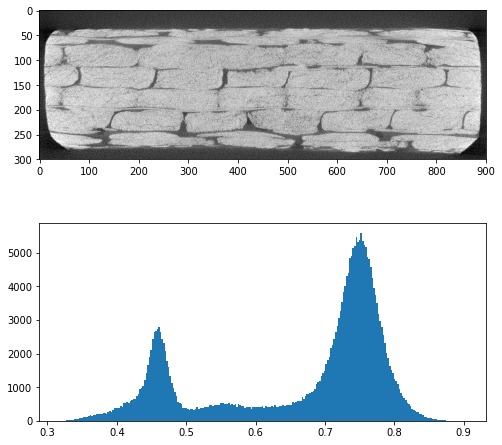

In [2]:
%matplotlib inline
from skimage.exposure import histogram
from skimage import img_as_float

img = tifffile.imread("../test_image.tif")
img = img_as_float(img)

f, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].imshow(img, cmap=plt.get_cmap('gray'))
ax[1].hist(img.ravel(), bins=255)
plt.show()

# Mean threshold

Determine the threshold by the mean of each pixel values in image.

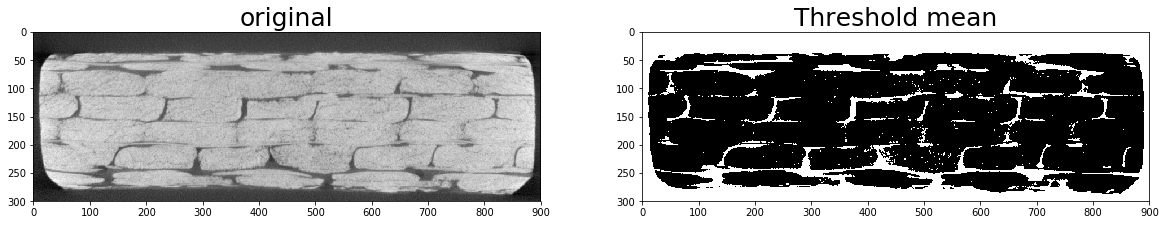

In [3]:
from skimage.filters import threshold_mean

th_mean = threshold_mean(img)
img_th_mean = img < th_mean

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("original", size=25)
ax[0].imshow(img, cmap="gray")
ax[1].set_title("Threshold mean", size=25)
ax[1].imshow(img_th_mean, cmap="gray")
plt.show()

# Bimodal threshold

The histogram is denoted by $y_0, \dots y_n$, where $y_i$ is the number of pixels in the image with gray-level $i$. Also we define $y_{-1}=y_{n+1}=1$. Then we keep applying the following smoothing operator until there are only **two peak values** in the histogram:

$$y_{i} = \frac{y_{i-1} + y_{i} + y_{i+1}}{3}$$

We can then find the threshold $y_i$ that is minimum between the valley $y_{\max}$ and $y_{\min}$    

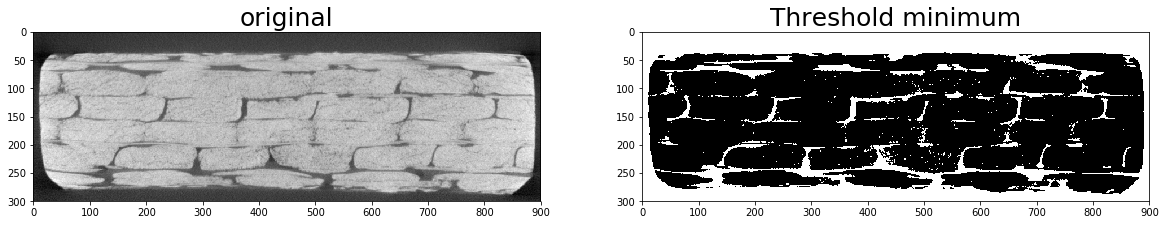

In [4]:
from skimage.filters import threshold_minimum

th_min = threshold_mean(img)
img_th_min = img < th_mean

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("original", size=25)
ax[0].imshow(img, cmap="gray")
ax[1].set_title("Threshold minimum", size=25)
ax[1].imshow(img_th_min, cmap="gray")
plt.show()

# Otsu's thresholding

Otsu's method determine the threshold such that the between class's variance is maximized, or equivalenty, within class's variance is minimized.

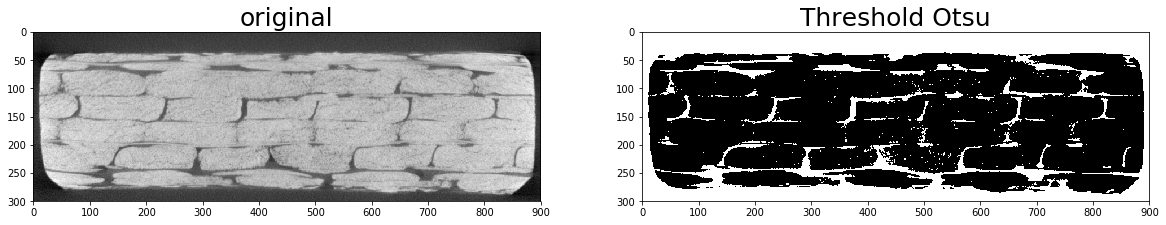

In [5]:
from skimage.filters import threshold_otsu

th_otsu = threshold_otsu(img)
img_th_otsu = img < th_mean

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("original", size=25)
ax[0].imshow(img, cmap="gray")
ax[1].set_title("Threshold Otsu", size=25)
ax[1].imshow(img_th_otsu, cmap="gray")
plt.show()